# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Abdullah Khan

EID: ak46996

Name: Michael Bohnet

EID: mrb4383

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:
A) g(x) is the estimator of theta, f(x) is the added random gaussian noise. This mathematical reprsentation would be the bias of the estimator. 

B) The bias is the expected difference between the estimated parameter and the actual values. A high bias will cause the predictive model to underfit and be less complex than we desire, as it does not pay much attention to the actual data. Variance is a measure of dispersion, or how far numbers are spread out from their average value. A model with high variance will cause overfitting and be over complex, and as a result it will match the data perfectly. For a model's purpose, neither of these outcomes is beneficial for predictive value. There is a trade off between the two, as to fully minimize variance would make the model under complex and vice versa. The model can be under and over complex at the same time. Thus the ideal model falls somewhere inbetween the two.



# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


Train: Mean squared error for 2nd Degree: 247.30
Train: Mean squared error for 4th Degree: 31.72
Train: Mean squared error for 7th Degree: 30.68


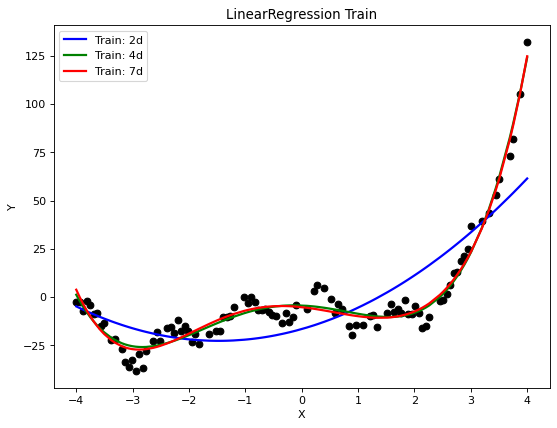

Test: Mean squared error for 2nd Degree: 320.06
Test: Mean squared error for 4th Degree: 31.29
Test: Mean squared error for 7th Degree: 33.41


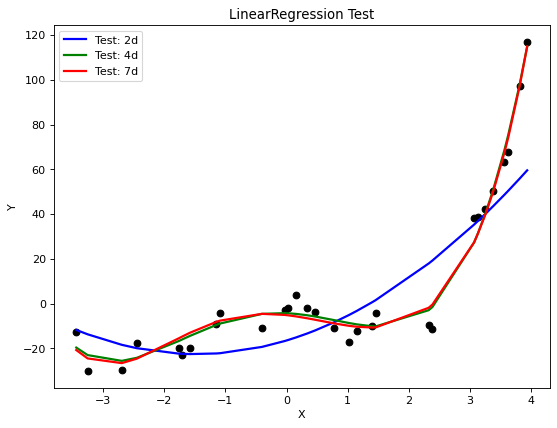

In [79]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)


# Fit polynomial models of degrees 2, 4, 7 to the training data. 
x_train2d = np.vander(np.squeeze(x_train), 3)
x_train4d = np.vander(np.squeeze(x_train), 5)
x_train7d = np.vander(np.squeeze(x_train), 8)
x_test2d = np.vander(np.squeeze(x_test), 3)
x_test4d = np.vander(np.squeeze(x_test), 5)
x_test7d = np.vander(np.squeeze(x_test), 8)


lrp = LinearRegression()
lrp.fit(x_train2d, y_train)
trainPred2d = lrp.predict(x_train2d)
testPred2d = lrp.predict(x_test2d)
print('Train: Mean squared error for 2nd Degree: %.2f'
      % mean_squared_error(y_train, trainPred2d))


lrp.fit(x_train4d, y_train)
trainPred4d = lrp.predict(x_train4d)
testPred4d = lrp.predict(x_test4d)
print('Train: Mean squared error for 4th Degree: %.2f'
      % mean_squared_error(y_train, trainPred4d))


lrp.fit(x_train7d, y_train)
trainPred7d = lrp.predict(x_train7d)
testPred7d = lrp.predict(x_test7d)
print('Train: Mean squared error for 7th Degree: %.2f'
      % mean_squared_error(y_train, trainPred7d))


order = np.argsort(x_train)
x_trainO = np.array(x_train)[order]
trainPred2dO = np.array(trainPred2d)[order]
trainPred4dO = np.array(trainPred4d)[order]
trainPred7dO = np.array(trainPred7d)[order]

figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train, color='black')
plt.plot(x_trainO, trainPred2dO, color='blue', label='Train: 2d', linewidth=2)
plt.plot(x_trainO, trainPred4dO, color='green', label='Train: 4d', linewidth=2)
plt.plot(x_trainO, trainPred7dO, color='red', label='Train: 7d', linewidth=2)
plt.title('LinearRegression Train')
plt.legend()  
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


print('Test: Mean squared error for 2nd Degree: %.2f'
      % mean_squared_error(y_test, testPred2d))
print('Test: Mean squared error for 4th Degree: %.2f'
      % mean_squared_error(y_test, testPred4d))
print('Test: Mean squared error for 7th Degree: %.2f'
      % mean_squared_error(y_test, testPred7d))


order = np.argsort(x_test)
x_testO = np.array(x_test)[order]
testPred2dO = np.array(testPred2d)[order]
testPred4dO = np.array(testPred4d)[order]
testPred7dO = np.array(testPred7d)[order]

figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test, color='black')
plt.plot(x_testO, testPred2dO, color='blue', label='Test: 2d', linewidth=2)
plt.plot(x_testO, testPred4dO, color='green', label='Test: 4d', linewidth=2)
plt.plot(x_testO, testPred7dO, color='red', label='Test: 7d', linewidth=2)
plt.title('LinearRegression Test')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [84]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 
    # Fit polynomial models of degrees 2, 4, 7 to the training data. 
    x_train2d = np.vander(np.squeeze(x_train), 3)
    x_train4d = np.vander(np.squeeze(x_train), 5)
    x_train7d = np.vander(np.squeeze(x_train), 8)
    x_test2d = np.vander(np.squeeze(x_test), 3)
    x_test4d = np.vander(np.squeeze(x_test), 5)
    x_test7d = np.vander(np.squeeze(x_test), 8)


    lrp = LinearRegression()
    lrp.fit(x_train2d, y_train)
    trainPred2d = lrp.predict(x_train2d)
    testPred2d = lrp.predict(x_test2d)
    print('Train: Mean squared error for 2nd Degree: %.2f'
    % mean_squared_error(y_train, trainPred2d))
    MSEtrain2d = mean_squared_error(y_train, trainPred2d)


    lrp.fit(x_train4d, y_train)
    trainPred4d = lrp.predict(x_train4d)
    testPred4d = lrp.predict(x_test4d)
    print('Train: Mean squared error for 4th Degree: %.2f'
    % mean_squared_error(y_train, trainPred4d))
    MSEtrain4d = mean_squared_error(y_train, trainPred4d)


    lrp.fit(x_train7d, y_train)
    trainPred7d = lrp.predict(x_train7d)
    testPred7d = lrp.predict(x_test7d)
    print('Train: Mean squared error for 7th Degree: %.2f'
    % mean_squared_error(y_train, trainPred7d))
    MSEtrain7d = mean_squared_error(y_train, trainPred7d)


    order = np.argsort(x_train)
    x_trainO = np.array(x_train)[order]
    trainPred2dO = np.array(trainPred2d)[order]
    trainPred4dO = np.array(trainPred4d)[order]
    trainPred7dO = np.array(trainPred7d)[order]

    figure(figsize=(8, 6), dpi=80)
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x_trainO, trainPred2dO, color='blue', label='Train: 2d', linewidth=2)
    plt.plot(x_trainO, trainPred4dO, color='green', label='Train: 4d', linewidth=2)
    plt.plot(x_trainO, trainPred7dO, color='red', label='Train: 7d', linewidth=2)
    plt.title('LinearRegression Train')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


    print('Test: Mean squared error for 2nd Degree: %.2f'
    % mean_squared_error(y_test, testPred2d))
    MSEtest2d = mean_squared_error(y_test, testPred2d)
    print('Test: Mean squared error for 4th Degree: %.2f'
    % mean_squared_error(y_test, testPred4d))
    MSEtest4d = mean_squared_error(y_test, testPred4d)
    print('Test: Mean squared error for 7th Degree: %.2f'
    % mean_squared_error(y_test, testPred7d))
    MSEtest7d = mean_squared_error(y_test, testPred7d)


    order = np.argsort(x_test)
    x_testO = np.array(x_test)[order]
    testPred2dO = np.array(testPred2d)[order]
    testPred4dO = np.array(testPred4d)[order]
    testPred7dO = np.array(testPred7d)[order]

    figure(figsize=(8, 6), dpi=80)
    plt.scatter(x_test, y_test, color='black')
    plt.plot(x_testO, testPred2dO, color='blue', label='Test: 2d', linewidth=2)
    plt.plot(x_testO, testPred4dO, color='green', label='Test: 4d', linewidth=2)
    plt.plot(x_testO, testPred7dO, color='red', label='Test: 7d', linewidth=2)
    plt.title('LinearRegression Test')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
  
    return [MSEtrain2d, MSEtrain4d, MSEtrain7d], [MSEtest2d, MSEtest4d, MSEtest7d]

20% data
Train: Mean squared error for 2nd Degree: 161.17
Train: Mean squared error for 4th Degree: 35.12
Train: Mean squared error for 7th Degree: 22.54


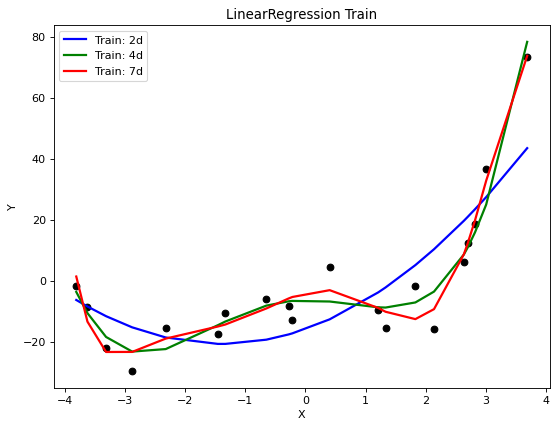

Test: Mean squared error for 2nd Degree: 402.32
Test: Mean squared error for 4th Degree: 38.34
Test: Mean squared error for 7th Degree: 135.21


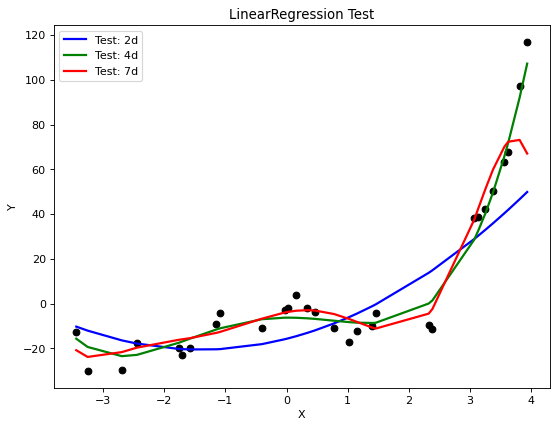

40% data
Train: Mean squared error for 2nd Degree: 150.33
Train: Mean squared error for 4th Degree: 31.62
Train: Mean squared error for 7th Degree: 25.49


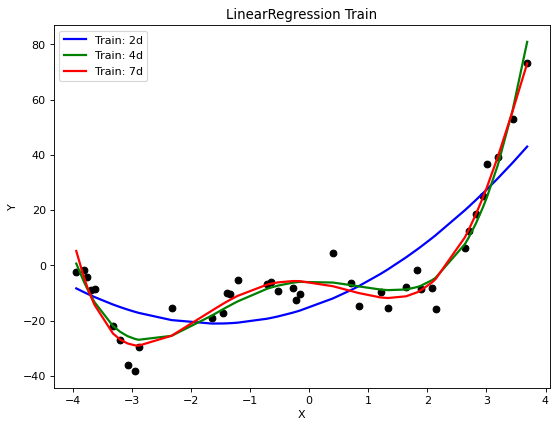

Test: Mean squared error for 2nd Degree: 405.81
Test: Mean squared error for 4th Degree: 33.16
Test: Mean squared error for 7th Degree: 61.24


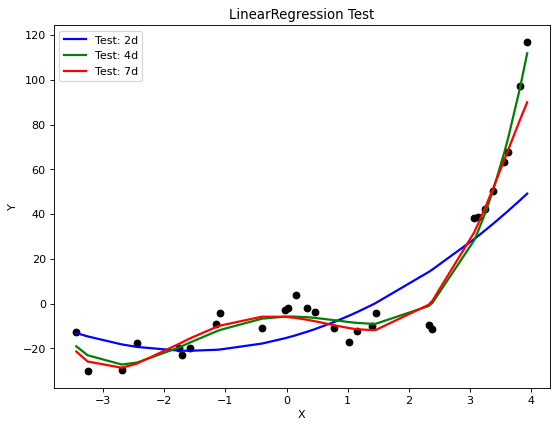

60% data
Train: Mean squared error for 2nd Degree: 150.08
Train: Mean squared error for 4th Degree: 29.19
Train: Mean squared error for 7th Degree: 26.10


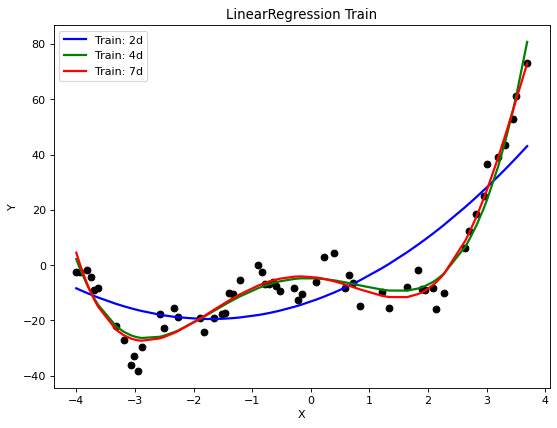

Test: Mean squared error for 2nd Degree: 403.25
Test: Mean squared error for 4th Degree: 31.78
Test: Mean squared error for 7th Degree: 60.17


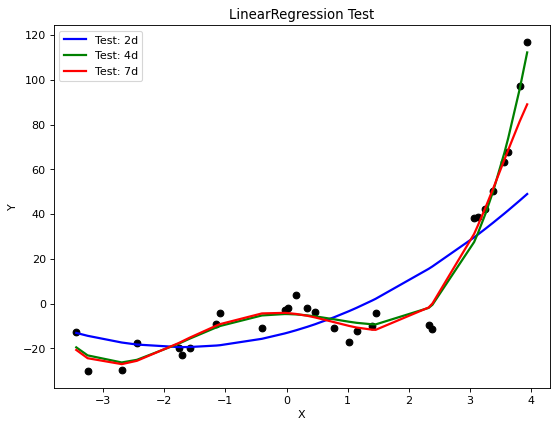

80% data
Train: Mean squared error for 2nd Degree: 168.12
Train: Mean squared error for 4th Degree: 29.31
Train: Mean squared error for 7th Degree: 26.55


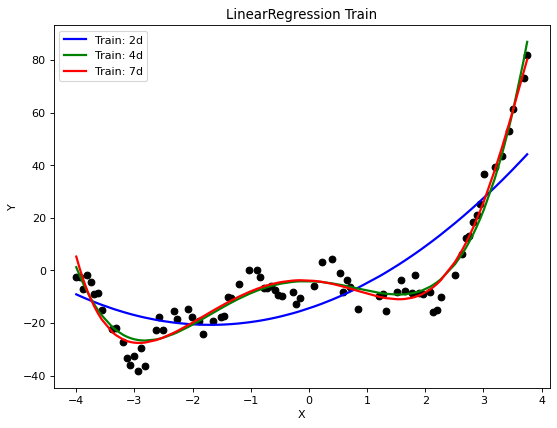

Test: Mean squared error for 2nd Degree: 407.59
Test: Mean squared error for 4th Degree: 32.52
Test: Mean squared error for 7th Degree: 48.08


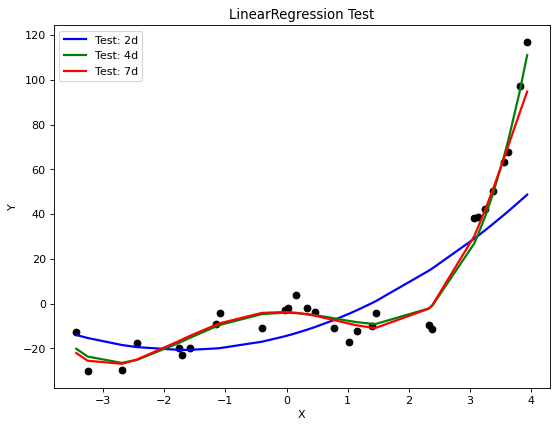

100% data
Train: Mean squared error for 2nd Degree: 247.30
Train: Mean squared error for 4th Degree: 31.72
Train: Mean squared error for 7th Degree: 30.68


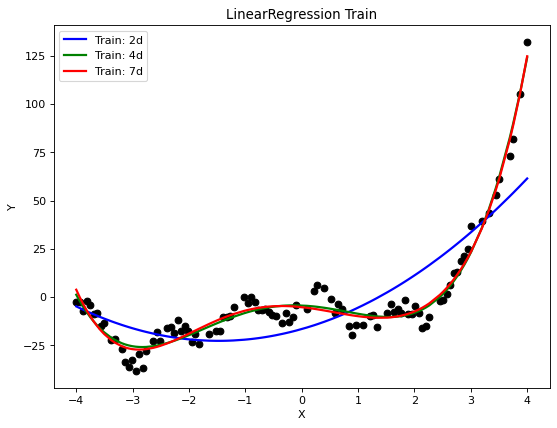

Test: Mean squared error for 2nd Degree: 320.06
Test: Mean squared error for 4th Degree: 31.29
Test: Mean squared error for 7th Degree: 33.41


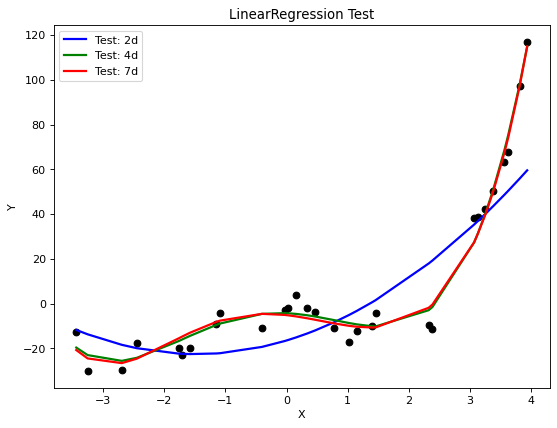

In [85]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

## Answer:

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:
A) Gradient descent and stochastic gradient descent operate in the same way in that they iterate through a data set to find the minimum. However, they do operate slightly differently. In gradient descent, ALL data values have to be run through before it can perform even one update. This is useful for being sure of accuracy, but if the data set is massive, this process can take a very long time. In stochastic gradient descent, the process is sped up by performing an update after EACH training example. While this does allow for significantly faster iterations, the error function does not get as well minimized as when using gradient descent. 

B) The Nelder-Mead method is utilized to find the minimum of a function. It works by taking two points near each other, finding the minimum value and then taking a step down from that point. In order to speed up the process, it adjusts the range at which it steps down dynamically from the loss of the new point. If the new point is better, it doubles the rate at which it steps down. If the new point is worse, it halves the rate in order to try and contract around the minimum. Once it finds the range in which the minimum is located, it brackets the range and performs a binary search to get the answer. The problem with the Nelder-Mead method, is that it's only effective on one or two dimensional problems. However, many machine learning problems can contain millions of parameters and this method won't work past a dozen or so parameters as the function would grow far too complex. 

# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

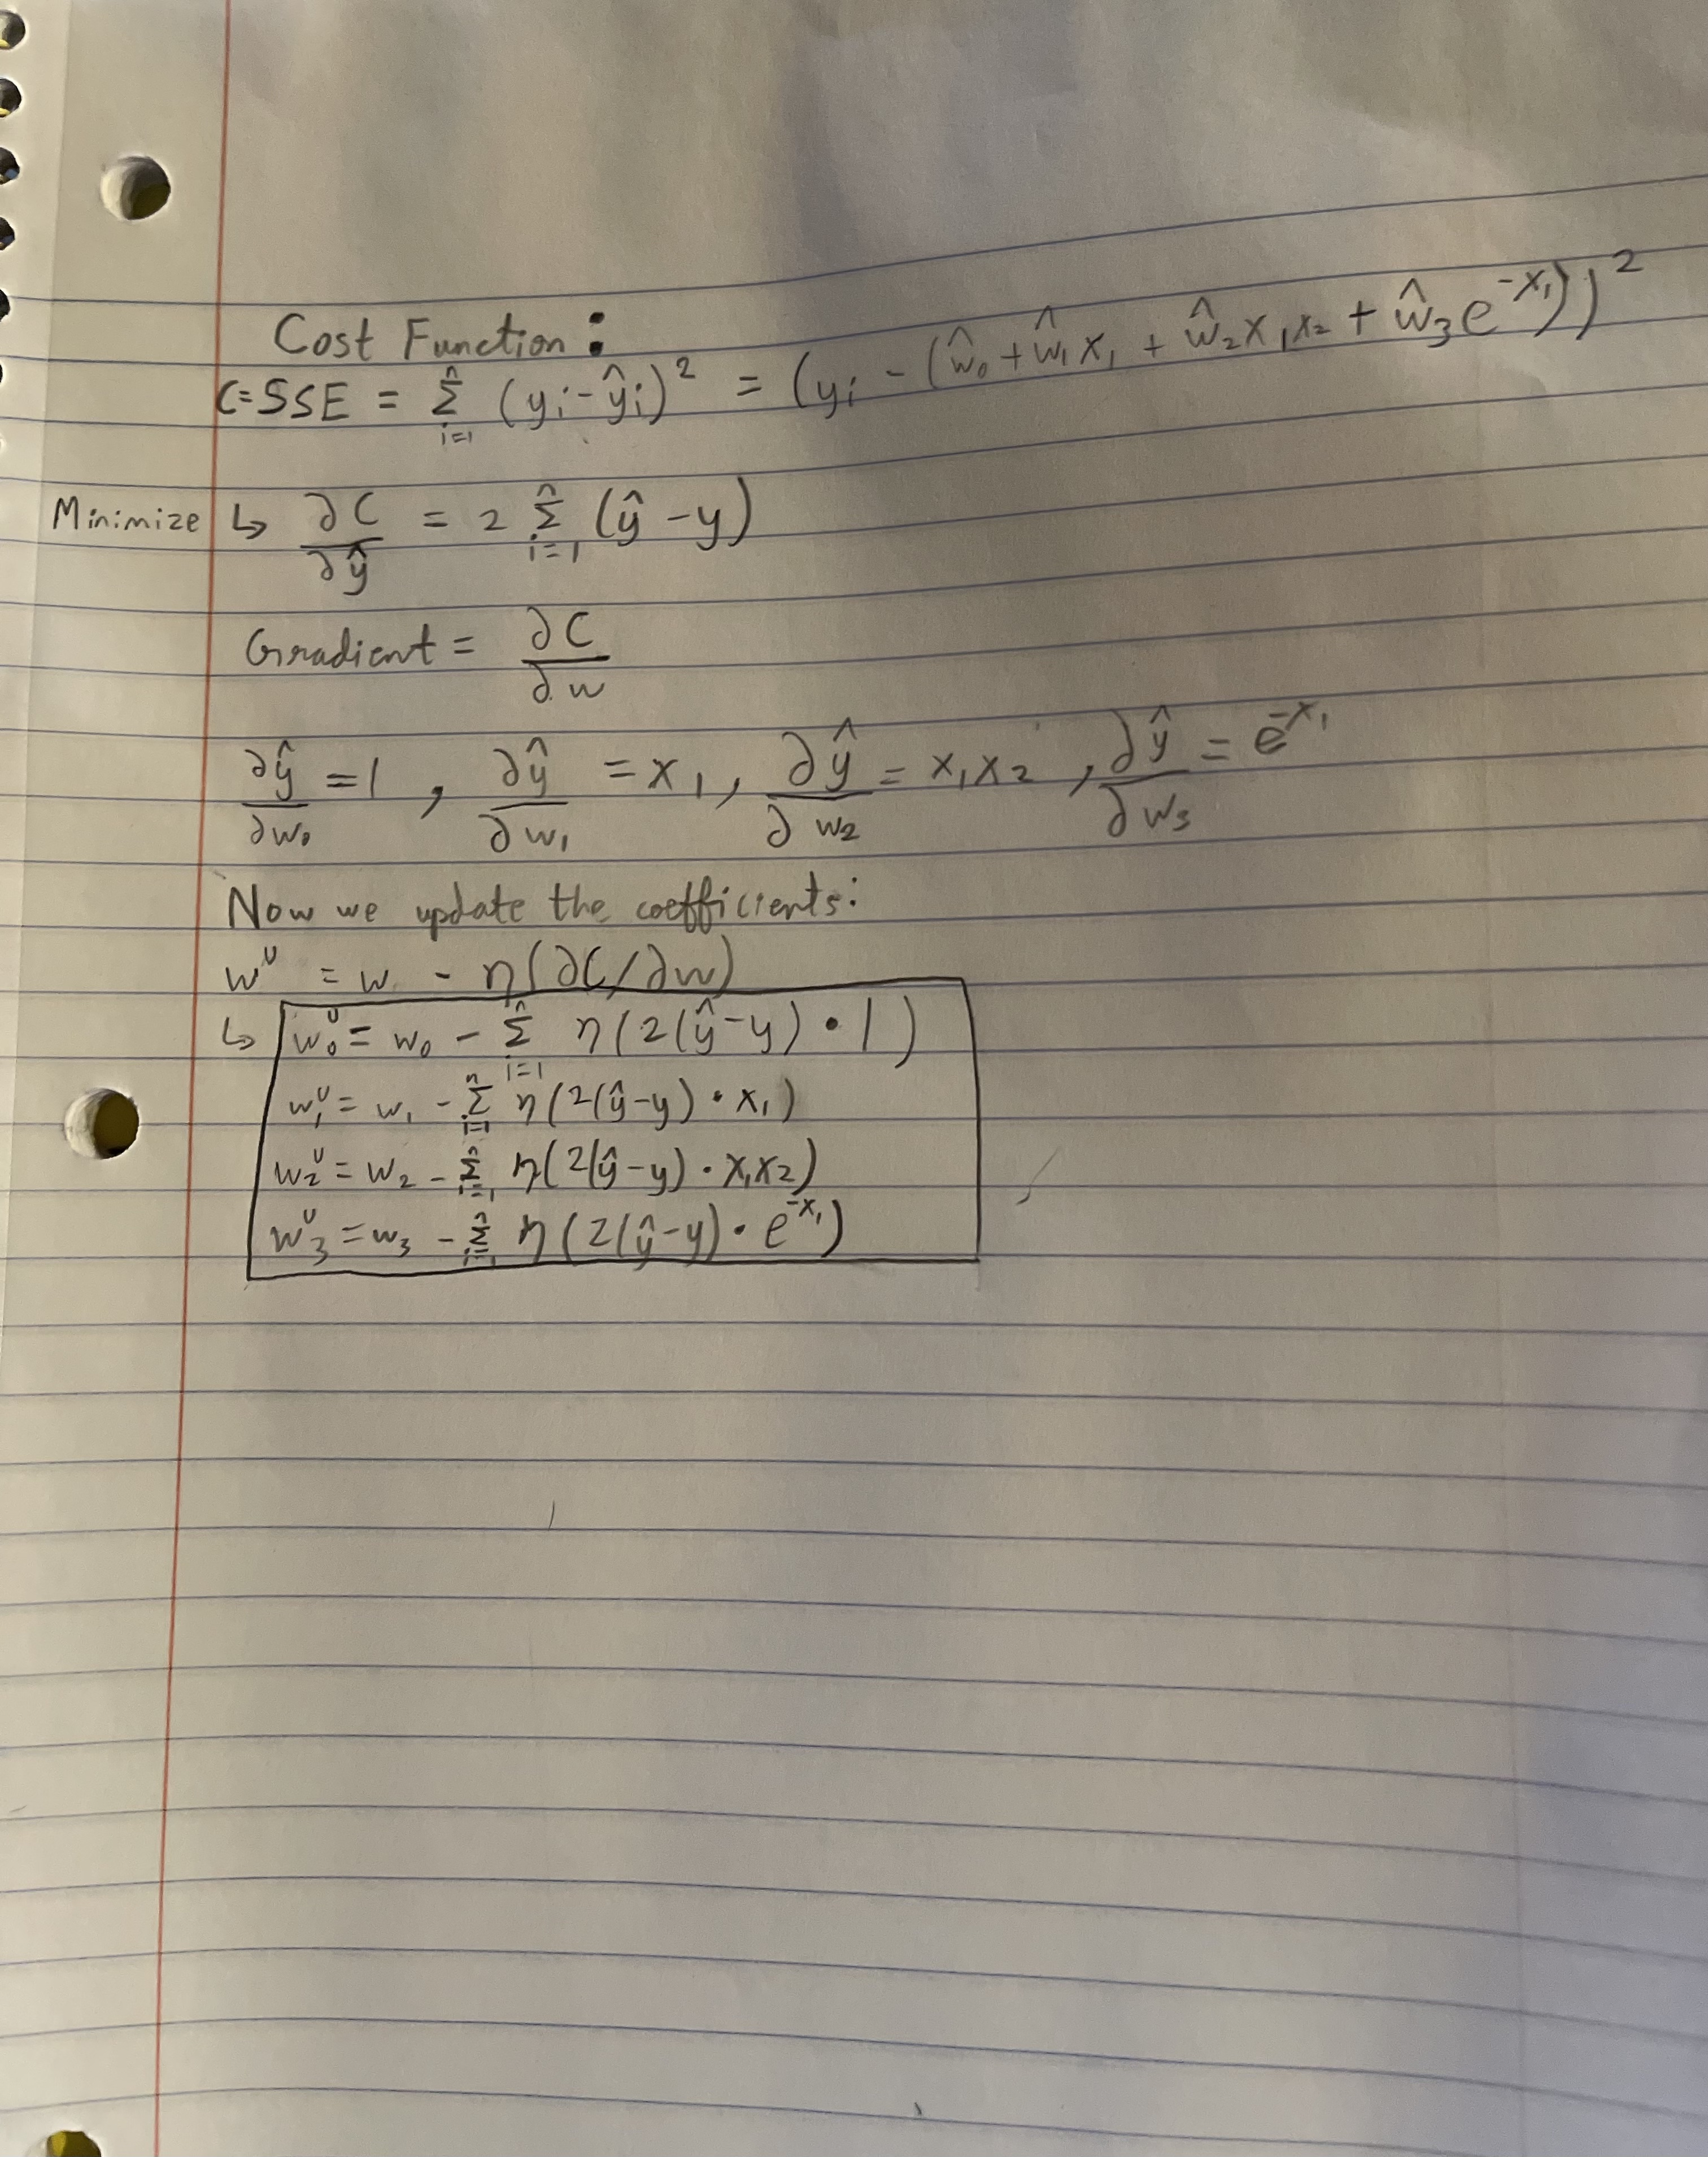

In [26]:
from IPython.display import Image
Image(filename = "q4 written work.jpg")

# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [27]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef + (self.learning_rate*gradient - self.learning_rate*self.regularization*self.coef)# = please put your codes here to update the self.coef using SGD
    

    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        self.cache = np.zeros(self.coef.shape)
        self.v = np.zeros(self.coef.shape)
        self.decay_rate = 0.9
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
        
                predict = self.linearPredict(X[i])
                error = y[i] - predict
                # Compute gradients

                gradient = error*X[i]
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
        predict = np.dot(X, self.coef)
        return predict

In [28]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answer:

In [20]:
out = []
for l in learning_rate:
    for r in regularization:
        model = Regression(learning_rate= l, regularization= r, n_epoch= n_epochs)
        fit = model.fit(X, y, update_rule='sgd', plot=False)
        out.append((l, r, model.lowest_mse))

<ipython-input-18-4d390638fbf3>:18: RuntimeWarning: overflow encountered in multiply
  self.coef = self.coef + (self.learning_rate*gradient - self.learning_rate*self.regularization*self.coef)# = please put your codes here to update the self.coef using SGD
<ipython-input-18-4d390638fbf3>:18: RuntimeWarning: invalid value encountered in add
  self.coef = self.coef + (self.learning_rate*gradient - self.learning_rate*self.regularization*self.coef)# = please put your codes here to update the self.coef using SGD
<ipython-input-18-4d390638fbf3>:44: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
<ipython-input-18-4d390638fbf3>:18: RuntimeWarning: invalid value encountered in multiply
  self.coef = self.coef + (self.learning_rate*gradient - self.learning_rate*self.regularization*self.coef)# = please put your codes here to update the self.coef using SGD


In [21]:
out

[(0.0001, 0, 0.036820511797458454),
 (0.0001, 10, 0.05612595064030494),
 (0.0001, 100, 0.0636364326583134),
 (0.001, 0, 0.030495991520073523),
 (0.001, 10, 0.056034199741275915),
 (0.001, 100, 0.06349227789221852),
 (0.01, 0, 0.02739108757520101),
 (0.01, 10, 0.05462635458091384),
 (0.01, 100, 0.06343718475083979),
 (0.1, 0, 0.030987628014180486),
 (0.1, 10, 0.05525368026081912),
 (0.1, 100, nan),
 (1, 0, inf),
 (1, 10, nan),
 (1, 100, nan),
 (10, 0, nan),
 (10, 10, nan),
 (10, 100, nan),
 (100, 0, nan),
 (100, 10, nan),
 (100, 100, nan)]

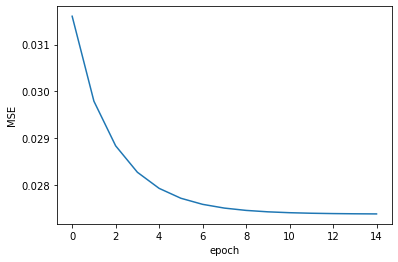

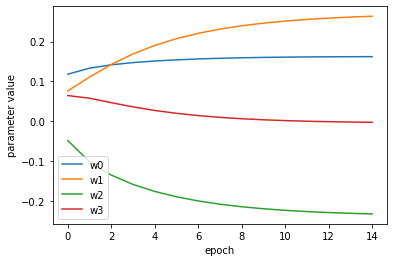

In [22]:
model = Regression(0.01, 0, n_epochs) #mse = 0.02739
fit = model.fit(X, y, update_rule = "sgd", plot = True)

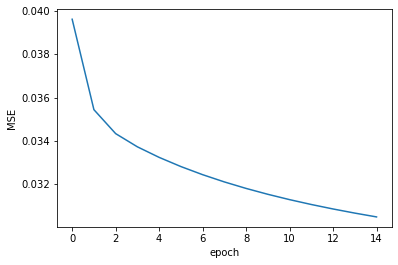

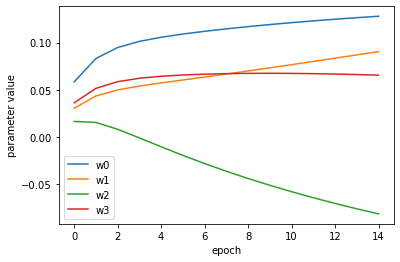

In [23]:
sgd = Regression(0.001, 0, n_epochs) #mse = 0.03049 
sgd_fit = sgd.fit(X, y, update_rule = "sgd", plot = True)